In [71]:
import numpy as np  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import random  # type: ignore

In [72]:
NUM_ITERATIONS = 100
NUM_PARTICLES = 10
EARLY_STOPPING_PATIENCE = 30

In [73]:
w = 0.5
c1 = 1
c2 = 2

In [74]:
def cost_function(position):
    y1 = -((position - 10) ** 2) + 4
    y2 = -((position + 10) ** 2) + 4
    return y1, y2

In [75]:
def generate_particle():
    position = np.random.uniform(low=-100.0, high=100.0, size=1)
    position = position.item()

    return {
        "position": position,
        "score": cost_function(position),
        "velocity": random.random(),
        "pbest": [position],
    }

In [76]:
def calculate_velocity(w, x, v, c1, c2, pbest, gbest):
    r1 = random.random()
    r2 = random.random()
    
    return w * v + c1 * r1 * (pbest - x) + c2 * r2 * (gbest - x)

In [77]:
def get_non_dominated_particles(positions):
    is_position_dominated = [False] * len(positions)

    for i in range(len(positions)):
        for j in range(len(positions)):
            if i != j:
                y1_i, y2_i = cost_function(positions[i])
                y1_j, y2_j = cost_function(positions[j])

                if (
                    (y1_j >= y1_i)
                    and (y2_j >= y2_i)
                    and ((y1_j > y1_i) or (y2_j > y2_i))
                ):
                    is_position_dominated[i] = True
                    break

    return [
        positions[i] for i in range(len(positions)) if is_position_dominated[i] is False
    ]

In [78]:
def update_position(particles, w, c1, c2, gbest):
    if gbest is None:
        gbest = particles[0]["pbest"]

    for particle in particles:
        particle["velocity"] = calculate_velocity(
            w,
            particle["position"],
            particle["velocity"],
            c1,
            c2,
            random.choice(particle["pbest"]),
            random.choice(gbest),
        )

        particle["position"] = particle["position"] + particle["velocity"]
        particle["score"] = cost_function(particle["position"])

        pbest_copy = particle["pbest"].copy()
        pbest_copy.append(particle["position"])

        particle["pbest"] = get_non_dominated_particles(pbest_copy)

        gbest_copy = gbest.copy()
        gbest_copy.append(particle["position"])

        gbest = get_non_dominated_particles(gbest_copy)

    return gbest

In [79]:
def plot(particles):
    # Obtendo os valores de posição como NumPy array
    positions = [particle["position"] for particle in particles]

    # Criando o gráfico com uma linha horizontal e pontos em positions
    plt.figure(figsize=(22, 4))
    plt.plot(
        positions, [0] * len(positions), marker="o", linestyle="", label="Pontos"
    )  # Plotando pontos em positions, eixo y fixado em zero
    plt.xlabel("Valor de X")  # Nomeando o eixo x
    plt.ylabel("Valor de Y")  # Nomeando o eixo y
    plt.title("Gráfico de Linha Unidimensional com Pontos")
    plt.xlim(-100, 100)
    plt.legend()  # Mostrando a legenda
    plt.grid(True)  # Adicionando grade ao gráfico (opcional)
    plt.show()  # Exibindo o gráfico

In [80]:
particles = [generate_particle() for _ in range(NUM_PARTICLES)]

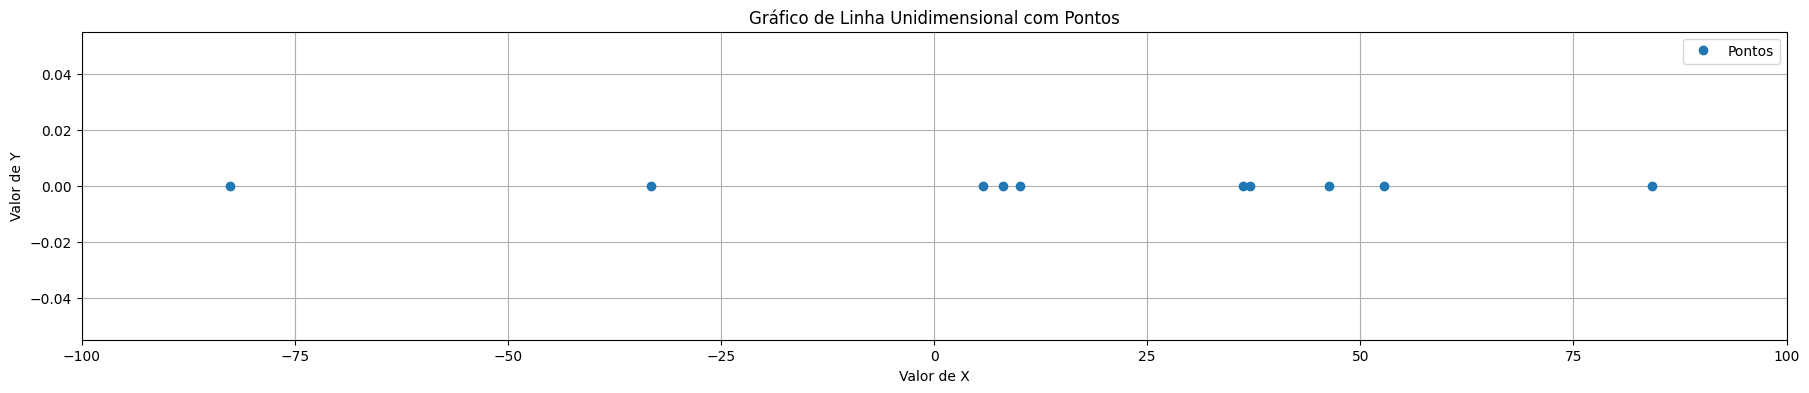

In [81]:
plot(particles)

In [82]:
i = 0
gbest = None
early_stopping_count = 0
last_gbest = None

while True:
    print(f"Iteration {i+1}")

    gbest = update_position(particles, w, c1, c2, gbest)

    if last_gbest != gbest:
        early_stopping_count = 0
        last_gbest = gbest
    else:
        early_stopping_count += 1

    i += 1

    if early_stopping_count == EARLY_STOPPING_PATIENCE:
        print("Early Stopping!")
        break

    if i == NUM_ITERATIONS:
        break

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration 77
Iteratio

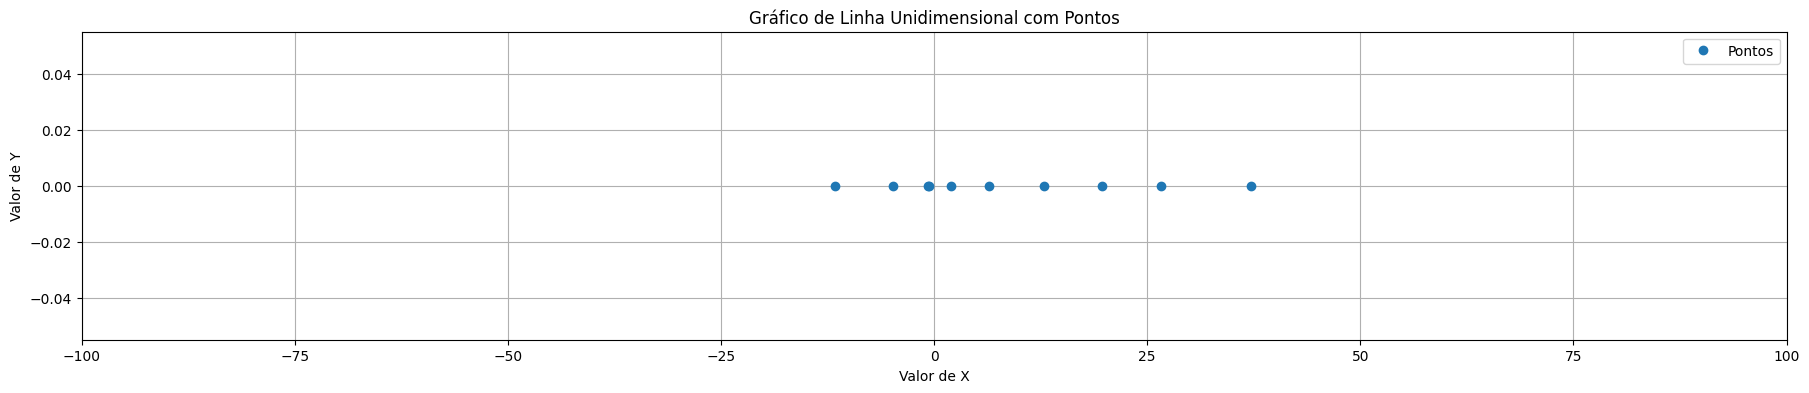

In [83]:
plot(particles)

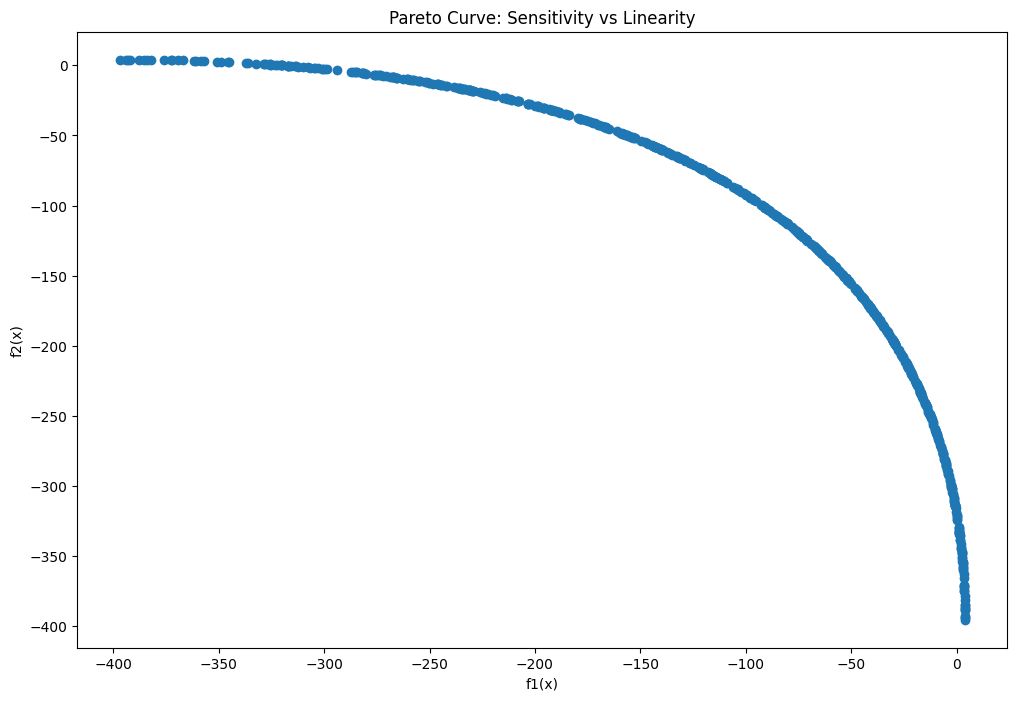

In [84]:
y1 = [cost_function(best)[0] for best in gbest]
y2 = [cost_function(best)[1] for best in gbest]

# Plotting the Pareto chart
plt.figure(figsize=(12, 8))
# Pontos não dominados
plt.scatter(y1, y2, marker="o", label="Non-dominated particles")
plt.xlabel("f1(x)")
plt.ylabel("f2(x)")
plt.title("Pareto Curve: Sensitivity vs Linearity")
plt.show()

In [85]:
def perpendicular_distance(point, line_start, line_end):
    line_vector = np.array(line_end) - np.array(line_start)
    point_vector = np.array(point) - np.array(line_start)
    line_length = np.linalg.norm(line_vector)
    if line_length == 0:
        return np.linalg.norm(point_vector)
    else:
        line_vector /= line_length
        projection = np.dot(point_vector, line_vector)
        perpendicular_vector = point_vector - projection * line_vector
        return np.linalg.norm(perpendicular_vector)

In [86]:
def find_knee_point(sorted_particles):
    knee_point = None
    max_distance = -np.inf
    for i in range(1, len(sorted_particles) - 1):
        dist = perpendicular_distance(
            cost_function(sorted_particles[i]),
            cost_function(sorted_particles[0]),
            cost_function(sorted_particles[-1]),
        )
        if dist > max_distance:
            max_distance = dist
            knee_point = sorted_particles[i]
    return knee_point

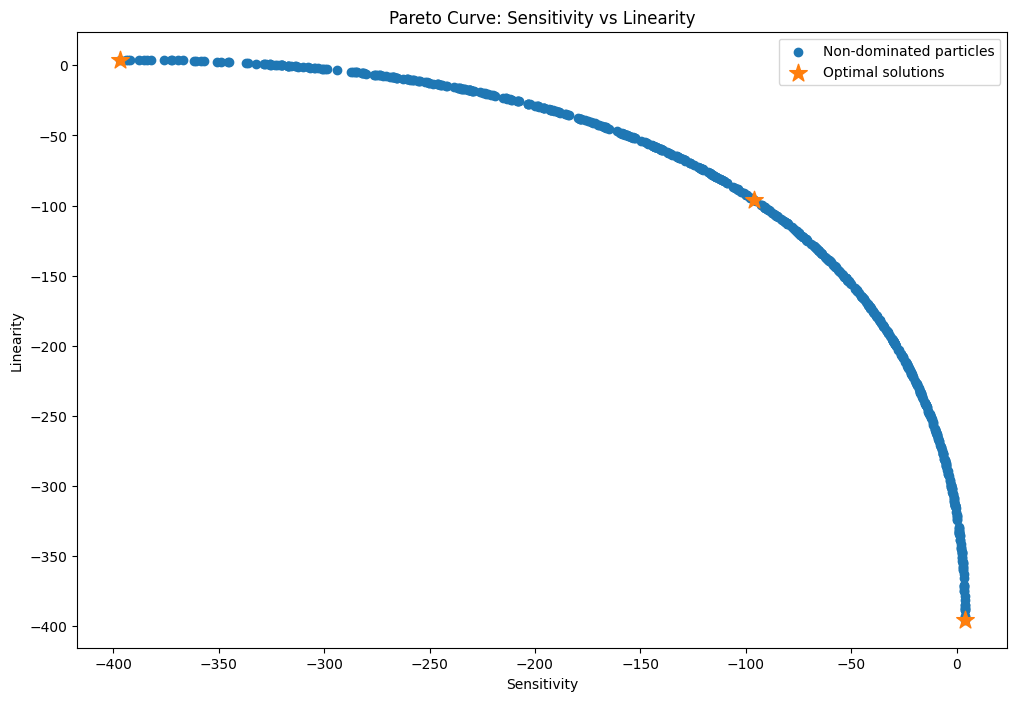

In [87]:
sorted_particles = sorted(gbest, key=lambda best: cost_function(best)[0])

knee_point = find_knee_point(sorted_particles)

solutions = [sorted_particles[0], knee_point, sorted_particles[-1]]

paretto_sensitivity = [cost_function(particle)[0] for particle in solutions]
paretto_linearity = [cost_function(particle)[1] for particle in solutions]

# Plotando o gráfico de Pareto
plt.figure(figsize=(12, 8))

# Pontos não dominados
plt.scatter(y1, y2, marker="o",  label="Non-dominated particles")

# Pontos ótimos
plt.scatter(paretto_sensitivity, paretto_linearity, s=175, marker="*",  label="Optimal solutions")

plt.xlabel("Sensitivity")
plt.ylabel("Linearity")
plt.title("Pareto Curve: Sensitivity vs Linearity")
plt.legend()
plt.show()

In [88]:
print(solutions)

[-10.025680408222897, -0.006331152175383714, 9.981485142472602]
